## Introduction

The aim of this tutorial is to provide a short introduction to the _prioritizr R_ package. It is also intended to help conservation planners familiar the _Marxan_ decision support tool [@r3] start using the package for their work.

In [1]:
#install.packages('/home/lukas/Downloads/gurobi952/linux64/R/gurobi_9.5-2_R_4.2.0.tar.gz')

Installiere Paket nach ‘/home/lukas/R/x86_64-pc-linux-gnu-library/4.2’
(da ‘lib’ nicht spezifiziert)

leite 'repos = NULL' aus 'pkgs' ab



In [2]:
#install.packages('prioritizr')

Installiere Paket nach ‘/home/lukas/R/x86_64-pc-linux-gnu-library/4.2’
(da ‘lib’ nicht spezifiziert)



In [3]:
#install.packages('prioritizrdata')

Installiere Paket nach ‘/home/lukas/R/x86_64-pc-linux-gnu-library/4.2’
(da ‘lib’ nicht spezifiziert)



In [4]:
#install.packages('vegan')

Installiere Paket nach ‘/home/lukas/R/x86_64-pc-linux-gnu-library/4.2’
(da ‘lib’ nicht spezifiziert)

installiere auch Abhängigkeit ‘permute’




## Data

Let's load the packages and data used in this tutorial. Since this tutorial uses data from the _prioritizrdata R_ package, please ensure that it is installed. The data used in this tutorial were obtained from the _Introduction to Marxan_ course. Specifically, the data were originally a subset of a larger spatial prioritization project performed under contract to Australia's Department of Environment and Water Resources [@r30].

In [5]:
# load packages
library(prioritizrdata)
library(prioritizr)
library(sf)
library(raster)
# library(vegan)
library(cluster)

# load planning unit data
data(tas_pu)

# load feature data
data(tas_features)

Lade nötiges Paket: raster

Lade nötiges Paket: sp

Warning message:
“libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden (GDAL error 1)”
Warning message:
“libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden (GDAL error 1)”
Warning message:
“libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden (GDAL error 1)”
Warning message:
“libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden (GDAL error 1)”
Lade nötiges Paket: sf

Warning message in CPL_gdal_init():
“GDAL Error 1: libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden”
Warning message in CPL_gdal_init():
“GDAL Error 1: libpodofo.so.0.9.8: Kann die Shared-Object-Datei nicht öffnen: Datei oder Verzeichnis nicht gefunden”
Warning message in CPL_gdal_init():
“GDAL Error 1: libpodofo.so.0.9.8: Kann di

The `tas_pu` object contains planning units represented as spatial polygons (i.e., a `SpatialPolygonsDataFrame` object). This object has three columns that denote the following information for each planning unit: a unique identifier (`id`), unimproved land value (`cost`), and current conservation status (`locked_in`). Planning units that have at least half of their area overlapping with existing protected areas are denoted with a locked in value of 1, otherwise they are denoted with a value of 0. If you are familiar with the _Marxan_ decision support tool, then you will notice that some of these columns are formatted similar conventions.

Now, let's have a look at the planning unit data. We can see that the planning units correspond to hexagonal land parcels. We can also see that is a clear spatial pattern in the cost and conservation status the planning units.

In [6]:
# print planning unit data
print(tas_pu)

class       : SpatialPolygonsDataFrame 
features    : 1130 
extent      : 298809.6, 613818.8, 5167775, 5502544  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 5
names       :   id,              cost, status, locked_in, locked_out 
min values  :    1, 0.192488262910798,      0,         0,          0 
max values  : 1130,  61.9272727272727,      2,         1,          0 


In [7]:
# plot map of planning unit costs
plot(st_as_sf(tas_pu[, "cost"]), main = "Planning unit costs")

In [38]:
st_as_sf(tas_pu[, "cost"])

ERROR while rich displaying an object: Error in loadNamespace(x): es gibt kein Paket namens ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geoj

cost      geometry                      
0    60.246377 MULTIPOLYGON (((328497 5497...
1    19.863008 MULTIPOLYGON (((307121.6 54...
2    59.680513 MULTIPOLYGON (((321726.1 54...
3    32.416138 MULTIPOLYGON (((304314.5 54...
4    26.177062 MULTIPOLYGON (((314958.5 54...
5    51.262177 MULTIPOLYGON (((327904.3 54...
6    32.299112 MULTIPOLYGON (((308194.1 54...
7    38.404063 MULTIPOLYGON (((322792.7 54...
8     3.554745 MULTIPOLYGON (((334896.6 54...
9     1.834921 MULTIPOLYGON (((356377.1 54...
10   57.116689 MULTIPOLYGON (((306601.2 54...
11   26.911484 MULTIPOLYGON (((316027.9 54...
12   13.756158 MULTIPOLYGON (((330624.2 54...
13   23.647160 MULTIPOLYGON (((309266.4 54...
14   22.474516 MULTIPOLYGON (((323859 5474...
15   31.820259 MULTIPOLYGON (((338453 5476...
16   15.637761 MULTIPOLYGON (((353048.4 54...
17   21.387045 MULTIPOLYGON (((302508.2 54...
18   51.408599 MULTIPOLYGON (((317097.1 54...
19   31.096041 MULTIPOLYGON (((331687.4 54...
20   16.177337 MULTIPOLYGON (((346279.1 54...
21   45.460957 MULTIPOLYGON (((360872.3 54...
22   50.107087 MULTIPOLYGON (((302265.1 54...
23   37.467004 MULTIPOLYGON (((310338.5 54...
24   37.145335 MULTIPOLYGON (((324925 5466...
25    6.023331 MULTIPOLYGON (((339513 5467...
26   26.836226 MULTIPOLYGON (((354102.4 54...
27   38.808277 MULTIPOLYGON (((368693.4 54...
28   23.611241 MULTIPOLYGON (((303583.2 54...
29   35.119282 MULTIPOLYGON (((318166 5460...
⋮    ⋮         ⋮                             
1100 37.52764  MULTIPOLYGON (((468187.8 51...
1101 37.62485  MULTIPOLYGON (((482567.6 51...
1102 29.53054  MULTIPOLYGON (((496950.3 51...
1103 31.49100  MULTIPOLYGON (((511336 5189...
1104 33.24312  MULTIPOLYGON (((525724.8 51...
1105 33.40484  MULTIPOLYGON (((422110.7 51...
1106 34.28761  MULTIPOLYGON (((430505.4 51...
1107 34.08832  MULTIPOLYGON (((445177.8 51...
1108 36.97046  MULTIPOLYGON (((460172.5 51...
1109 37.90963  MULTIPOLYGON (((475873.3 51...
1110 36.37289  MULTIPOLYGON (((490250.9 51...
1111 37.70296  MULTIPOLYGON (((508875.1 51...
1112 33.88029  MULTIPOLYGON (((516306.7 51...
1113 32.70317  MULTIPOLYGON (((424395.1 51...
1114 32.72121  MULTIPOLYGON (((440835.5 51...
1115 30.52483  MULTIPOLYGON (((452616.2 51...
1116 37.68904  MULTIPOLYGON (((468706.9 51...
1117 37.67497  MULTIPOLYGON (((483555.6 51...
1118 35.44444  MULTIPOLYGON (((496334.7 51...
1119 37.85348  MULTIPOLYGON (((510809.6 51...
1120 37.31083  MULTIPOLYGON (((526180.6 51...
1121 40.58065  MULTIPOLYGON (((466027.8 51...
1122 37.58487  MULTIPOLYGON (((476864.6 51...
1123 37.10072  MULTIPOLYGON (((491234.7 51...
1124 38.18391  MULTIPOLYGON (((520010.8 51...
1125 37.19740  MULTIPOLYGON (((470318.3 51...
1126 37.83782  MULTIPOLYGON (((482338 5171...
1127 37.18886  MULTIPOLYGON (((475976.3 51...
1128 37.74579  MULTIPOLYGON (((489710.7 51...
1129 40.64000  MULTIPOLYGON (((486461.3 51...

In [8]:
# plot map of planning unit coverage by protected areas
plot(st_as_sf(tas_pu[, "locked_in"]), main = "Protected area coverage")

The `tas_features` object describes the spatial distribution of the features. Specifically, the feature data are expressed as a stack of `r raster::nlayers(tas_features)` rasters (i.e., a `RasterStack` object). Each layer in the stack corresponds to one of `r raster::nlayers(tas_features)` different vegetation communities. To describe the spatial distribution of a given vegetation community, each layer contains a spatially referenced grid of rectangular cells and each of these grid cells is associated with information on the distribution of the a given vegetation community. Specifically, these grid cells are assigned values that indicate if a given vegetation community is present (using value of 1) or absent (using value of 0) within the spatial extent of each grid cell.

Next, let's examine the feature data. Here we will only plot the first four features as an example. The pixel values denote the presence (denoted by a value of 1) or absence (denoted by a value of zero) of each feature within the extent of the study area.

In [9]:
# print planning unit data
print(tas_features)

class      : RasterStack 
dimensions : 398, 359, 142882, 62  (nrow, ncol, ncell, nlayers)
resolution : 1000, 1000  (x, y)
extent     : 288801.7, 647801.7, 5142976, 5540976  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names      : tas_features.1, tas_features.2, tas_features.3, tas_features.4, tas_features.5, tas_features.6, tas_features.7, tas_features.8, tas_features.9, tas_features.10, tas_features.11, tas_features.12, tas_features.13, tas_features.14, tas_features.15, ... 
min values :              0,              0,              0,              0,              0,              0,              0,              0,              0,               0,               0,               0,               0,               0,               0, ... 
max values :              1,              1,              1,              1,              1,              1,              1,              1,              1,               1,  

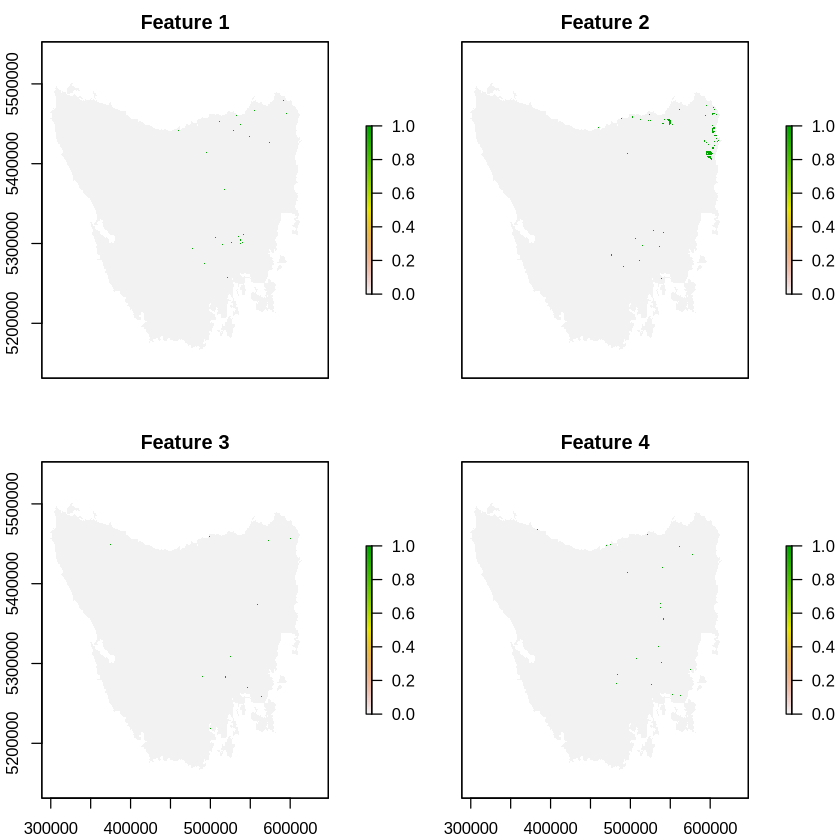

In [10]:
# plot map of the first four vegetation classes
plot(tas_features[[1:4]], main = paste("Feature", 1:4))

The planning units in this tutorial are stored as spatial polygons. Although spatial polygons provide considerable flexibility in the shape and size of the planning units, such flexibility comes at a cost. This is because the spatial data processing routines needed to combine spatial polygon data and raster data for optimization can be very computationally expensive (e.g., calculating zonal statistics). As a consequence, we generally recommend using raster-based planning unit data where possible to reduce processing time. Another strategy is to complete spatial data processing routines manually using other software (e.g., _ESRI ArcGIS_) and use the pre-processed data directly with the _prioritizr R_ package.

## Problem formulation

Now we will formulate a conservation planing problem. To achieve this, we first specify which objects contain the planning unit and feature data (using the `problem()` function). Next, we specify that we want to use the minimum set objective function (using the `add_min_set_objective()` function). This objective function indicates that we wish to minimize the total cost of planning units selected by the prioritization. We then specify boundary penalties reduce spatial fragmentation in the resulting prioritization (using the `add_boundary_penalties()` function; see the [_Calibrating trade-offs_ vignette](calibrating_trade-offs_tutorial.html) for details on calibrating the penalty value). We also specify representation targets to ensure the resulting prioritization provides adequate coverage of each vegetation community (using the `add_relative_targets()` function). Specifically, we specify targets to ensure at least 17% of the spatial extent of each vegetation community (based on the [Aichi Target 11](https://www.cbd.int/sp/targets/)). Additionally, we set constraints to ensure that planning units predominately covered by existing protected areas are selected by the prioritization (using the `add_locked_in_constraints()` function). Finally, we specify that the prioritization should either select -- or not select -- planning units for prioritization (using the `add_binary_decisions()` function).

In [11]:
# build problem
p1 <- problem(tas_pu, tas_features, cost_column = "cost") %>%
      add_min_set_objective() %>% # 
      add_boundary_penalties(penalty = 0.005) %>%
      add_relative_targets(0.17) %>%
      add_locked_in_constraints("locked_in") %>%
      add_binary_decisions()

# print the problem
print(p1)

Conservation Problem
  planning units: SpatialPolygonsDataFrame (1130 units)
  cost:           min: 0.19249, max: 61.92727
  features:       tas_features.1, tas_features.2, tas_features.3, ... (62 features)
  objective:      Minimum set objective 
  targets:        Relative targets [targets (min: 0.17, max: 0.17)]
  decisions:      Binary decision 
  constraints:    <Locked in planning units [257 locked units]>
  penalties:      <Boundary penalties [edge factor (min: 0.5, max: 0.5), penalty (0.005), zones]>
  portfolio:      default
  solver:         default



## Prioritization

We can now solve the problem formulation (`p1`) to generate a prioritization (using the `solve()` function). The _prioritizr_ R package supports a range of different exact algorithm solvers, including _Gurobi_, _IBM CPLEX_, _CBC_, _Rsymphony_, and _lpsymphony_. Although there are benefits and limitations associated with each of these different solvers, they should return similar results. Note that you will need at least one solver installed on your system to generate prioritizations. Since we did not specify a solver when building the problem, the _prioritizr R_ package will automatically select the best available solver installed. We recommend using the _Gurobi_ solver if possible, and have used it for this tutorial (see the _Gurobi Installation Guide_ vignette for installation instructions). After solving the problem, the prioritization will be stored in the `solution_1` column of the `s1` object.

In [12]:
# solve problem
s1 <- solve(p1)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads
Optimize a model with 6358 rows, 4278 columns and 14496 nonzeros
Model fingerprint: 0xcace16e0
Variable types: 0 continuous, 4278 integer (4278 binary)
Coefficient statistics:
  Matrix range     [2e-06, 4e+01]
  Objective range  [5e-01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 1e+02]
Found heuristic solution: objective 36805.575211
Found heuristic solution: objective 27817.085072
Presolve removed 2077 rows and 1375 columns
Presolve time: 0.08s
Presolved: 4281 rows, 2903 columns, 9594 nonzeros
Found heuristic solution: objective 24454.499456
Variable types: 0 continuous, 2903 integer (2903 binary)
Found heuristic solution: objective 23413.987477
Root relaxation presolved: 4281 rows, 2903 columns, 9594 nonzeros


Root relaxation: objective 1.955605e+04, 1793 iterations, 0.21 seconds (0.19 work units)

    Nodes    |    Current Nod

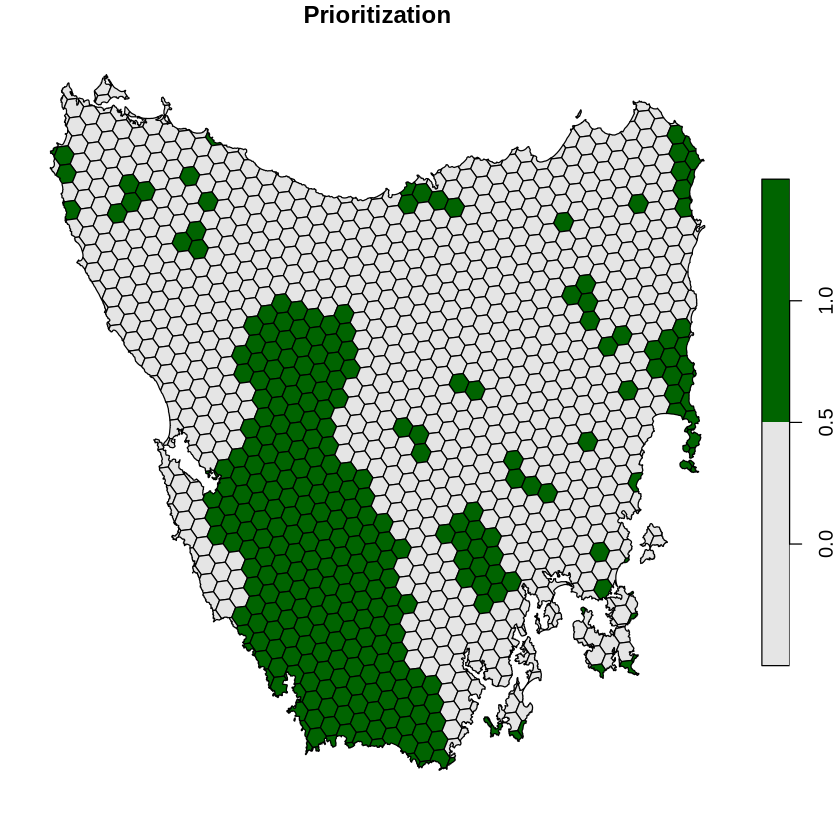

In [13]:
# plot map of prioritization
plot(st_as_sf(s1[, "solution_1"]), main = "Prioritization",
     pal = c("grey90", "darkgreen"))

## Feature representation

Let's examine how well the vegetation communities are represented by existing protected areas and the prioritization.

In [14]:
# create column with existing protected areas
tas_pu$pa <- round(tas_pu$locked_in)

# calculate feature representation statistics based on existing protected areas
tc_pa <- eval_target_coverage_summary(p1, tas_pu[, "pa"])
print(tc_pa)

# A tibble: 62 × 9
   feature         met   total…¹ absol…² absol…³ absol…⁴ relat…⁵ relat…⁶ relat…⁷
   <chr>           <lgl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 tas_features.1  FALSE    33.9    5.77   0.556    5.21    0.17  0.0164  0.154 
 2 tas_features.2  FALSE   170.    28.9   13.5     15.4     0.17  0.0796  0.0904
 3 tas_features.3  FALSE    24.0    4.08   2.00     2.08    0.17  0.0832  0.0868
 4 tas_features.4  FALSE    32.8    5.57   1.37     4.19    0.17  0.0420  0.128 
 5 tas_features.5  FALSE    24.8    4.21   0        4.21    0.17  0       0.17  
 6 tas_features.6  FALSE    22.0    3.74   0        3.74    0.17  0       0.17  
 7 tas_features.7  FALSE    16.4    2.78   0        2.78    0.17  0       0.17  
 8 tas_features.8  FALSE    43.0    7.31   5.12     2.19    0.17  0.119   0.0510
 9 tas_features.9  FALSE   388.    66.0   22.4     43.5     0.17  0.0578  0.112 
10 tas_features.10 FALSE    14.5    2.47   0        2.47    0.17  0       0.17  
# … with 

It is clearly visible, that the existing protected areas have bad coverage for the conservation features. None of the first 10 features is covered to the required 17%, as visible by the columns `absolute_shortfall` and `relative_shortfall`.

In [15]:
# calculate  feature representation statistics based on the prioritization
tc_s1 <- eval_target_coverage_summary(p1, s1[, "solution_1"])
print(tc_s1)

# A tibble: 62 × 9
   feature         met   total…¹ absol…² absol…³ absol…⁴ relat…⁵ relat…⁶ relat…⁷
   <chr>           <lgl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 tas_features.1  TRUE     33.9    5.77    5.97       0    0.17   0.176       0
 2 tas_features.2  TRUE    170.    28.9    43.8        0    0.17   0.258       0
 3 tas_features.3  TRUE     24.0    4.08    4.25       0    0.17   0.177       0
 4 tas_features.4  TRUE     32.8    5.57    6.37       0    0.17   0.195       0
 5 tas_features.5  TRUE     24.8    4.21    4.98       0    0.17   0.201       0
 6 tas_features.6  TRUE     22.0    3.74    7.00       0    0.17   0.318       0
 7 tas_features.7  TRUE     16.4    2.78    3.00       0    0.17   0.183       0
 8 tas_features.8  TRUE     43.0    7.31    8.12       0    0.17   0.189       0
 9 tas_features.9  TRUE    388.    66.0    70.8        0    0.17   0.182       0
10 tas_features.10 TRUE     14.5    2.47    2.91       0    0.17   0.200       0
# … with 

In [16]:
# explore representation by existing protected areas
## calculate number of features adequately represented by existing protected
## areas
sum(tc_pa$met)

[1] 16

In [17]:
## summarize representation (values show percent coverage)
summary(tc_pa$relative_held * 100)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.845  13.909  16.995  58.488 

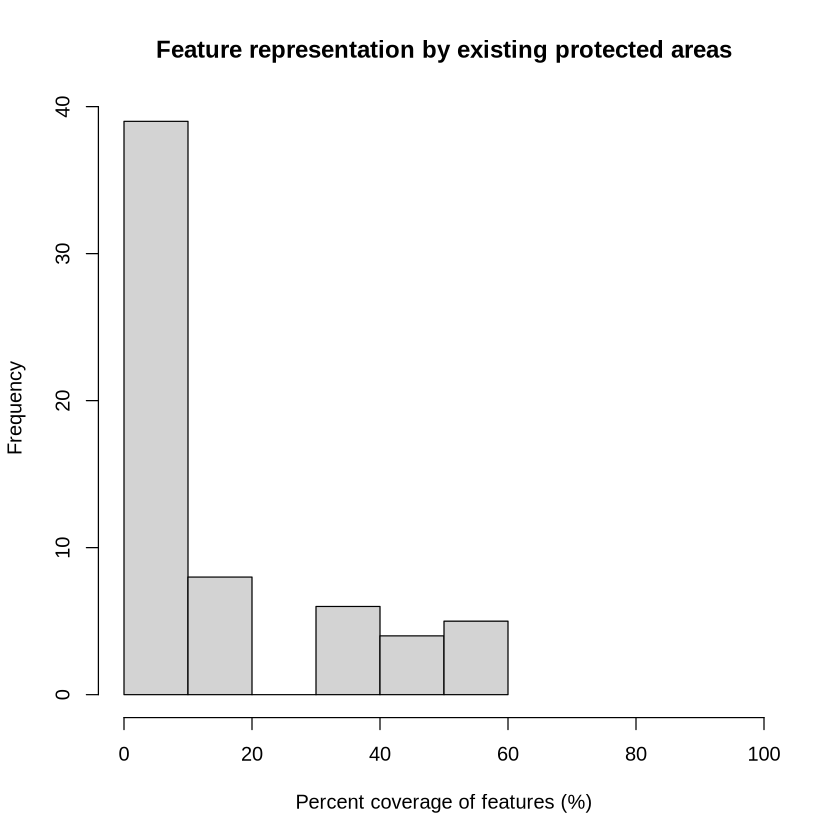

In [18]:
## visualize representation  (values show percent coverage)
hist(tc_pa$relative_held * 100,
     main = "Feature representation by existing protected areas",
     xlim = c(0, 100),
     xlab = "Percent coverage of features (%)")

In [19]:
# explore representation by prioritization
## summarize representation (values show percent coverage)
summary(tc_s1$relative_held * 100)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.14   20.18   25.56   33.83   43.19  100.00 

In [20]:
## calculate number of features adequately represented by the prioritization
sum(tc_s1$met)

[1] 62

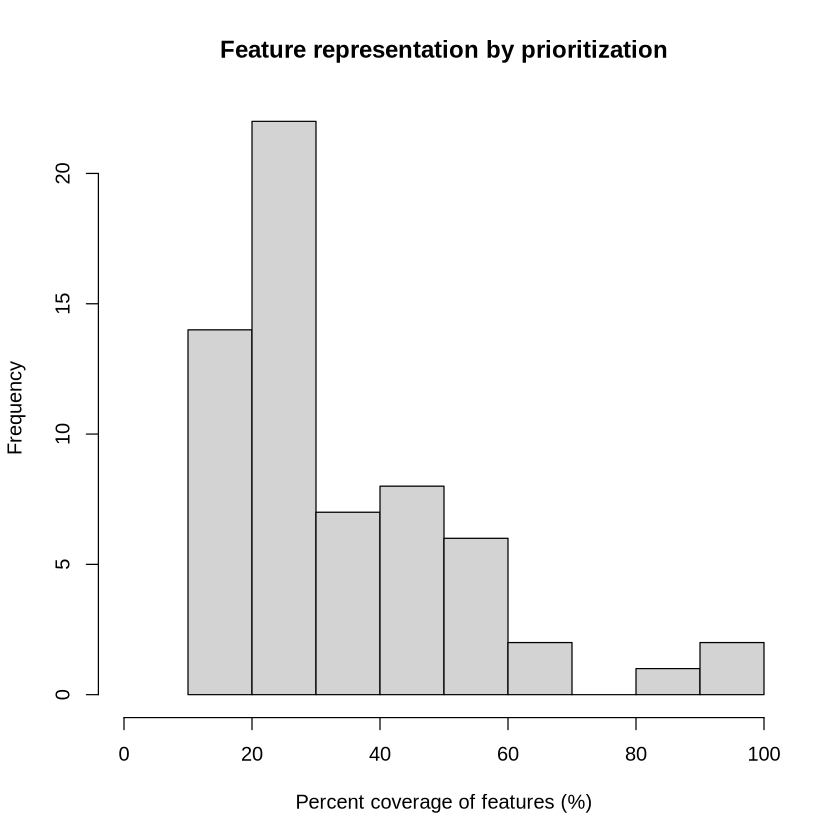

In [21]:
## visualize representation  (values show percent coverage)
hist(tc_s1$relative_held * 100,
     main = "Feature representation by prioritization",
     xlim = c(0, 100),
     xlab = "Percent coverage of features (%)")

We can see that representation of the vegetation communities by existing protected areas is remarkably poor. For example, many of the vegetation communities have nearly zero coverage by existing protected areas. In other words, are almost entirely absent from  existing protected areas. We can also see that all vegetation communities have at least 17% coverage by the prioritization -- meaning that it meets the representation targets for all of the features.

## Irreplaceability

After generating the prioritization, we can examine the relative importance of planning units selected by the prioritization. This can be useful to identify critically important planning units for conservation -- in other words, places that contain biodiversity features which cannot be represented anywhere else -- and schedule implementation of the prioritization. To achieve this, we will use the Ferrier metric [@r34].

In [22]:
# calculate irreplaceability
irrep_s1 <- eval_ferrier_importance(p1, s1["solution_1"])
print(irrep_s1)

class       : SpatialPolygonsDataFrame 
features    : 1130 
extent      : 298809.6, 613818.8, 5167775, 5502544  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 63
names       :      tas_features.1,     tas_features.2,      tas_features.3,      tas_features.4,      tas_features.5,    tas_features.6,      tas_features.7,      tas_features.8,      tas_features.9,     tas_features.10,   tas_features.11,     tas_features.12,    tas_features.13,   tas_features.14,     tas_features.15, ... 
min values  :                   0,                  0,                   0,                   0,                   0,                 0,                   0,                   0,                   0,                   0,                 0,                   0,                  0,                 0,                   0, ... 
max values  : 0.00701698358267939, 0.0066775439067078, 0.00248592654648536, 0.0059479698473550

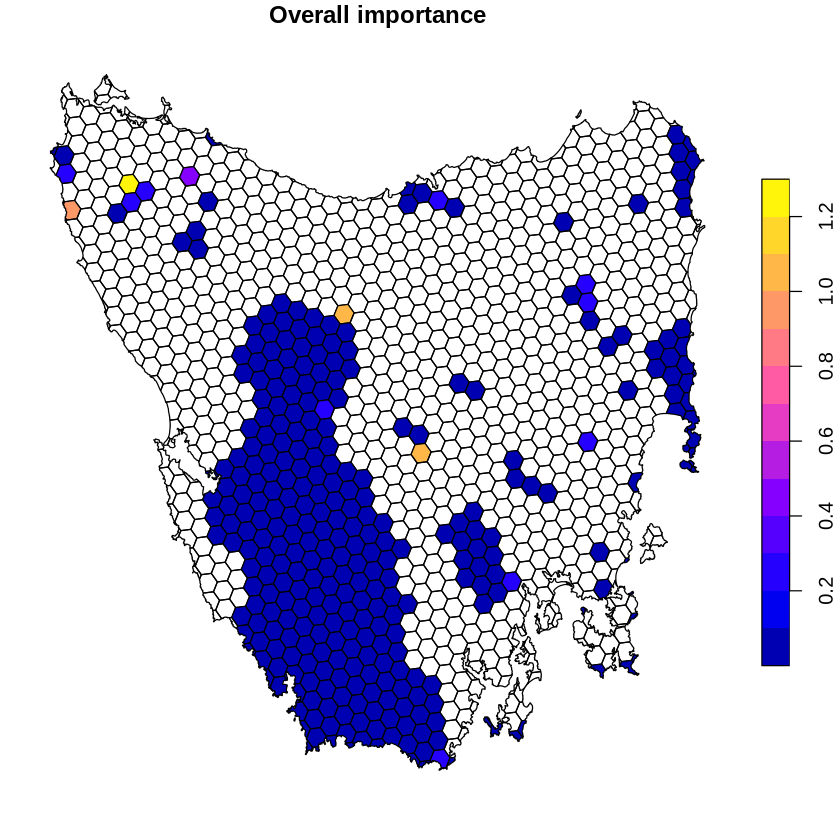

In [23]:
# manually coerce values for planning units not selected in prioritization
# to NA, so that they are shown in white
irrep_s1$plot_total <- irrep_s1$total
irrep_s1$plot_total[s1$solution_1 < 0.5] <- NA_real_

# plot map of overall importance scores
plot(st_as_sf(irrep_s1[, "plot_total"]), main = "Overall importance")

## Portfolios

Conservation planning exercises often involve generating multiple different prioritizations. This can help decision makers consider different options, and provide starting points for building consensus among stakeholders. To generate a range of different prioritizations given the same problem formulation, we can use portfolio functions. Here we will use the gap portfolio to generate 1000 solutions that are within 30% of optimality. Please note that you will need to have the *Gurobi* solver installed to use this specific portfolio. If you don't have access to *Gurobi*, you could try using the shuffle portfolio instead (using the `add_shuffle_portfolio()` function).

In [24]:
# create new problem with a portfolio added to it
p2 <- p1 %>%
      add_gap_portfolio(number_solutions = 1000, pool_gap = 0.2)

# print problem
print(p2)

Conservation Problem
  planning units: SpatialPolygonsDataFrame (1130 units)
  cost:           min: 0.19249, max: 61.92727
  features:       tas_features.1, tas_features.2, tas_features.3, ... (62 features)
  objective:      Minimum set objective 
  targets:        Relative targets [targets (min: 0.17, max: 0.17)]
  decisions:      Binary decision 
  constraints:    <Locked in planning units [257 locked units]>
  penalties:      <Boundary penalties [edge factor (min: 0.5, max: 0.5), penalty (0.005), zones]>
  portfolio:      Gap portfolio [number_solutions (1000), pool_gap (0.2)]
  solver:         default



In [25]:
# generate prioritizations
prt <- solve(p2)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads
Optimize a model with 6358 rows, 4278 columns and 14496 nonzeros
Model fingerprint: 0xcace16e0
Variable types: 0 continuous, 4278 integer (4278 binary)
Coefficient statistics:
  Matrix range     [2e-06, 4e+01]
  Objective range  [5e-01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 1e+02]
Found heuristic solution: objective 36805.575211
Found heuristic solution: objective 27817.085072
Presolve removed 1434 rows and 258 columns
Presolve time: 0.03s
Presolved: 4924 rows, 4020 columns, 10889 nonzeros
Variable types: 0 continuous, 4020 integer (4020 binary)
Found heuristic solution: objective 27660.082384
Root relaxation presolved: 4924 rows, 4020 columns, 10889 nonzeros


Root relaxation: objective 1.954728e+04, 1905 iterations, 0.22 seconds (0.18 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Exp

In [26]:
print(prt)

class       : SpatialPolygonsDataFrame 
features    : 1130 
extent      : 298809.6, 613818.8, 5167775, 5502544  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 1005
names       :   id,              cost, status, locked_in, locked_out, solution_1, solution_2, solution_3, solution_4, solution_5, solution_6, solution_7, solution_8, solution_9, solution_10, ... 
min values  :    1, 0.192488262910798,      0,         0,          0,          0,          0,          0,          0,          0,          0,          0,          0,          0,           0, ... 
max values  : 1130,  61.9272727272727,      2,         1,          0,          1,          1,          1,          1,          1,          1,          1,          1,          1,           1, ... 


After generating all these prioritizations, we now want some way to visualize them. Because it would be onerous to look at each and every prioritization individually, we will use statistical analyses to help us. We can visualize the differences between these different prioritizations -- based on which planning units they selected -- using a hierarchical cluster analysis [@r35].

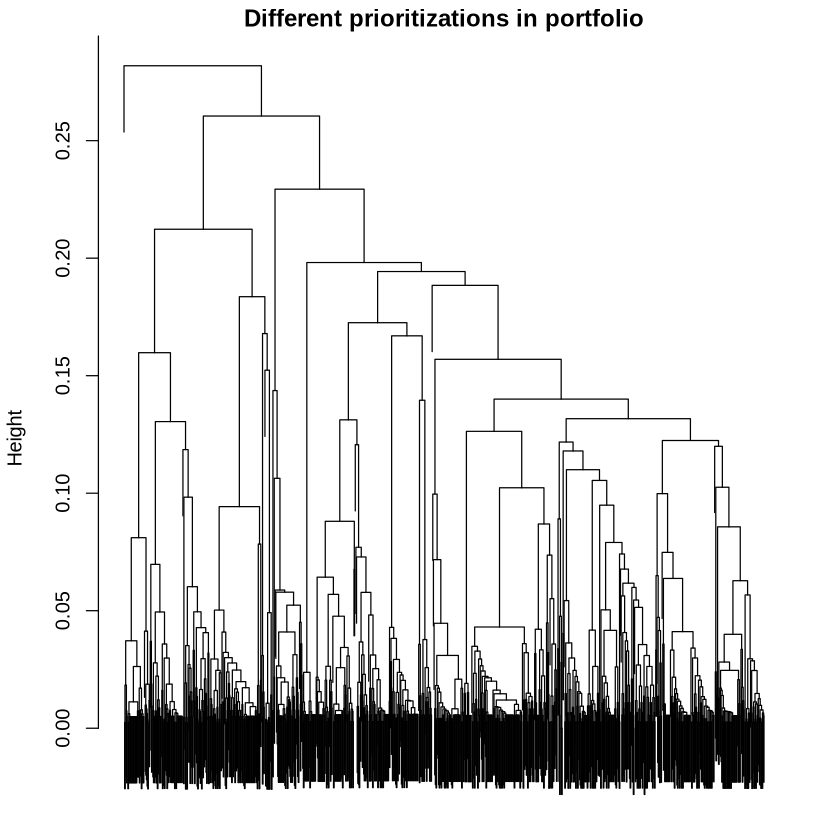

In [27]:
# extract solutions
prt_results <- prt@data[, startsWith(names(prt), "solution_"), ]

# calculate pair-wise distances between different prioritizations for analysis
prt_dists <- vegan::vegdist(t(prt_results), method = "jaccard", binary = TRUE)

# run cluster analysis
prt_clust <- hclust(as.dist(prt_dists), method = "average")

# visualize clusters
opar <- par()
par(oma = c(0, 0, 0, 0), mar= c(0, 4.1, 1.5, 2.1))
plot(prt_clust, labels = FALSE, sub = NA, xlab = "",
     main = "Different prioritizations in portfolio")
suppressWarnings(par(opar))

We can see that there are approximately six main groups of prioritizations in the portfolio. To explore these different groups, let's conduct another cluster analysis (i.e., a _k_-medoids analysis) to extract the most representative prioritization from each of these groups. In other words, we will run another statistical analysis to find the most central prioritization within each group.'

In [28]:
# run k-medoids analysis
prt_med <- pam(prt_dists, k = 6)

# extract names of prioritizations that are most central for each group.
prt_med_names <- prt_med$medoids
print(prt_med_names)

[1] "solution_38"  "solution_416" "solution_86"  "solution_35"  "solution_665"
[6] "solution_221"


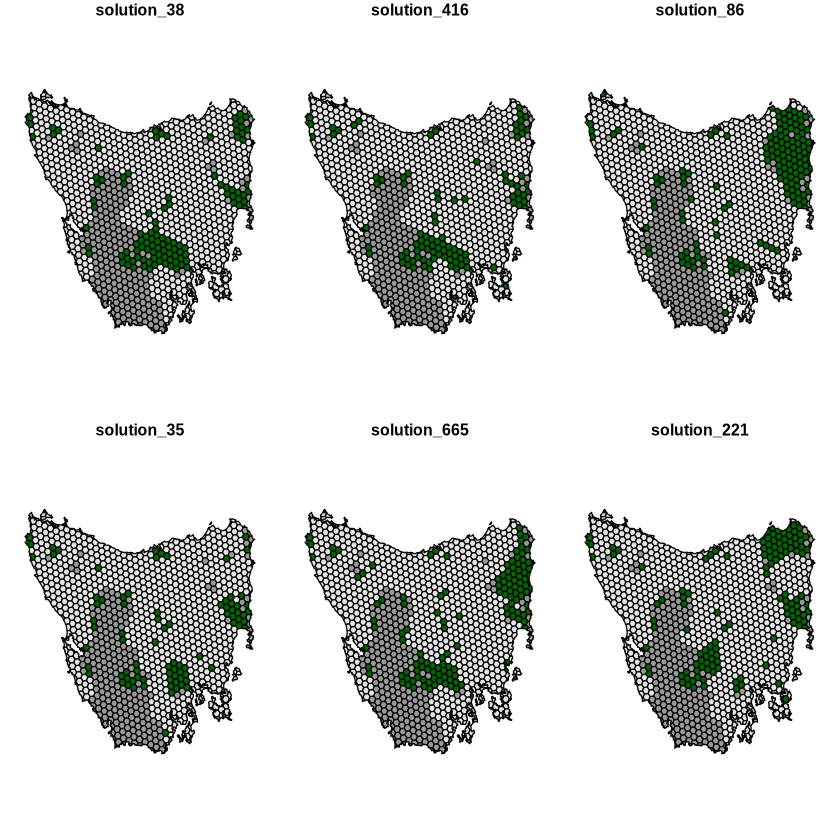

In [29]:
# create a copy of prt and set values for locked in planning units to -1
# so we can easily visualize differences between prioritizations
prt2 <- prt[, prt_med_names]
prt2@data[which(tas_pu$locked_in > 0.5), prt_med_names] <- -1

# plot a map showing main different prioritizations
# dark grey: locked in planning units
# grey: planning units not selected
# green: selected planning units
plot(st_as_sf(prt2), pal = c("grey60", "grey90", "darkgreen"))

## _Marxan_ compatibility

The _prioritizr R_ package provides functionality to help _Marxan_ users generate prioritizations. Specifically, it can import conservation planning data prepared for _Marxan_, and can generate prioritizations using a similar problem formulation as _Marxan_ [based on @r1]. Indeed, the problem formulation presented earlier in this vignette is very similar to that used by _Marxan_. The key difference is that the problem formulation we specified earlier uses "hard constraints" for feature representation, and _Marxan_ uses "soft constraints" for feature representation. This means that prioritization we generated earlier was mathematically guaranteed to reach the targets for all features. However, if we used _Marxan_ to generate the prioritization, then we could have produced a prioritization that would fail to reach targets (depending the _Species Penalty Factors_ used to generate the prioritization). In addition to these differences in terms problem formulation, the _prioritizr R_ package uses exact algorithms -- instead of the simulated annealing algorithm -- which ensures that we obtain prioritizations that are near optimal.

Here we will show the _prioritizr R_ package can import _Marxan_ data and generate a prioritization. To begin with, let's import a conservation planning data prepared for _Marxan_.

In [30]:
# import data
## planning unit data
pu_path <- system.file("extdata/input/pu.dat", package = "prioritizr")
pu_data <- read.csv(pu_path, header = TRUE, stringsAsFactors = FALSE)
print(head(pu_data))

  id       cost status    xloc     yloc
1  3      0.000      0 1116623 -4493479
2 30   7527.275      3 1110623 -4496943
3 56  37349.075      0 1092623 -4500408
4 58  16959.021      0 1116623 -4500408
5 84  34220.256      0 1098623 -4503872
6 85 178907.584      0 1110623 -4503872


In [31]:
## feature data
spec_path <- system.file("extdata/input/spec.dat", package = "prioritizr")
spec_data <- read.csv(spec_path, header = TRUE, stringsAsFactors = FALSE)
print(head(spec_data))

  id prop spf   name
1 10  0.3   1  bird1
2 11  0.3   1  nvis2
3 12  0.3   1  nvis8
4 13  0.3   1  nvis9
5 14  0.3   1 nvis14
6 15  0.3   1 nvis20


In [32]:
## amount of each feature within each planning unit data
puvspr_path <- system.file("extdata/input/puvspr.dat", package = "prioritizr")
puvspr_data <- read.csv(puvspr_path, header = TRUE, stringsAsFactors = FALSE)
print(head(puvspr_data))

  species  pu     amount
1      26  56 120.344884
2      26  58  45.167010
3      26  84  68.047375
4      26  85   9.735624
5      26  86   7.803476
6      26 111 478.327417


In [33]:
## boundary data
bound_path <- system.file("extdata/input/bound.dat", package = "prioritizr")
bound_data <- read.table(bound_path, header = TRUE, stringsAsFactors = FALSE)
print(head(bound_data))

  id1 id2 boundary
1   3   3    16000
2   3  30     4000
3   3  58     4000
4  30  30    12000
5  30  58     4000
6  30  85     4000


After importing the data, we can now generate a prioritization based on the _Marxan_ problem formulation (using the `marxan_problem()` function). **Please note that this function does not generate prioritizations using _Marxan_.** Instead, it uses the data to create an optimization problem formulation similar to _Marxan_ -- using hard constraints instead of soft constraints -- and uses an exact algorithm solver to generate a prioritization.

In [34]:
# create problem
p2 <- marxan_problem(pu_data, spec_data, puvspr_data, bound_data,
                     blm = 0.0005)

# print problem
print(p2)

Conservation Problem
  planning units: data.frame (1751 units)
  cost:           min: 0, max: 415692.19382
  features:       bird1, nvis2, nvis8, ... (17 features)
  objective:      Minimum set objective 
  targets:        Relative targets [targets (min: 0.3, max: 0.3)]
  decisions:      default
  constraints:    <Locked out planning units [1 locked units]
                   Locked in planning units [317 locked units]>
  penalties:      <Boundary penalties [edge factor (min: 1, max: 1), penalty (5e-04), zones]>
  portfolio:      default
  solver:         default



In [35]:
# solve problem
s2 <- solve(p2)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads
Optimize a model with 10075 rows, 6780 columns and 24778 nonzeros
Model fingerprint: 0x37d7a0a1
Variable types: 0 continuous, 6780 integer (6780 binary)
Coefficient statistics:
  Matrix range     [5e-05, 4e+03]
  Objective range  [4e+00, 4e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+03, 3e+05]
Found heuristic solution: objective 1.221202e+08
Presolve removed 4707 rows and 3103 columns
Presolve time: 0.10s
Presolved: 5368 rows, 3677 columns, 12704 nonzeros
Variable types: 0 continuous, 3677 integer (3677 binary)
Found heuristic solution: objective 1.009944e+08
Root relaxation presolved: 5368 rows, 3677 columns, 12704 nonzeros


Root relaxation: objective 9.564790e+07, 521 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

In [36]:
# print first six rows of solution object
print(head(s2))

  id       cost status    xloc     yloc locked_in locked_out solution_1
1  3      0.000      0 1116623 -4493479     FALSE      FALSE          0
2 30   7527.275      3 1110623 -4496943     FALSE       TRUE          0
3 56  37349.075      0 1092623 -4500408     FALSE      FALSE          0
4 58  16959.021      0 1116623 -4500408     FALSE      FALSE          0
5 84  34220.256      0 1098623 -4503872     FALSE      FALSE          0
6 85 178907.584      0 1110623 -4503872     FALSE      FALSE          0


## Conclusion

This tutorial shows how the _prioritizr R_ package can be used to build a conservation problem, generate a prioritization, and evaluate it. Although we explored just a few functions, the package provides many different functions so that you can build and custom-tailor conservation planning problems to suit your needs. To learn more about the package, please see the package vignettes for [an overview of the package](package_overview.html), [instructions for installing the _Gurobi_ optimization suite](gurobi_installation_guide.html), [benchmarks comparing the performance of different solvers](solver_benchmarks.html), and [a record of publications that have cited the package](publication_record.html). In addition to this tutorial, the package also provides tutorials on [incorporating connectivity into prioritizations](connectivity_tutorial.html), [calibrating trade-offs between different criteria](calibrating_trade-offs_tutorial.html) (e.g., total cost and spatial fragmentation), and [creating prioritizations that have multiple management zones or management actions](management_zones_tutorial.html).

In [41]:
s1

ERROR while rich displaying an object: Error in loadNamespace(x): es gibt kein Paket namens ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.SpatialPolygonsDataFrame(obj

class       : SpatialPolygonsDataFrame 
features    : 1130 
extent      : 298809.6, 613818.8, 5167775, 5502544  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 6
names       :   id,              cost, status, locked_in, locked_out, solution_1 
min values  :    1, 0.192488262910798,      0,         0,          0,          0 
max values  : 1130,  61.9272727272727,      2,         1,          0,          1 

In [40]:
#install.packages('geojsonio')

Installiere Paket nach ‘/home/lukas/R/x86_64-pc-linux-gnu-library/4.2’
(da ‘lib’ nicht spezifiziert)

installiere auch Abhängigkeiten ‘bit’, ‘triebeard’, ‘bit64’, ‘tidyselect’, ‘progress’, ‘urltools’, ‘httpcode’, ‘protolite’, ‘lazyeval’, ‘geometries’, ‘jsonify’, ‘rapidjsonr’, ‘sfheaders’, ‘hms’, ‘vroom’, ‘tzdb’, ‘crul’, ‘geojson’, ‘geojsonsf’, ‘jqr’, ‘maptools’, ‘readr’, ‘rgeos’, ‘V8’


Warning message in install.packages("geojsonio"):
“Installation eines oder mehrerer Pakete schlug fehl,
 vermutlich ‘V8’, ‘geojsonio’”


In [42]:
str(s1)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	1130 obs. of  6 variables:
  .. ..$ id        : int [1:1130] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ cost      : num [1:1130] 60.2 19.9 59.7 32.4 26.2 ...
  .. ..$ status    : int [1:1130] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..$ locked_in : logi [1:1130] FALSE FALSE FALSE FALSE FALSE FALSE ...
  .. ..$ locked_out: logi [1:1130] FALSE FALSE FALSE FALSE FALSE FALSE ...
  .. ..$ solution_1: num [1:1130] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ polygons   :List of 1130
  .. ..$ :Formal class 'Polygons' [package "sp"] with 5 slots
  .. .. .. ..@ Polygons :List of 2
  .. .. .. .. ..$ :Formal class 'Polygon' [package "sp"] with 5 slots
  .. .. .. .. .. .. ..@ labpt  : num [1:2] 327602 5499162
  .. .. .. .. .. .. ..@ area   : num 768912
  .. .. .. .. .. .. ..@ hole   : logi FALSE
  .. .. .. .. .. .. ..@ ringDir: int 1
  .. .. .. .. .. .. ..@ coords : num [1:19, 1:2] 328497 326784 326776 326788 326871 ...
  .. .. .. .. 

In [43]:
s1$solution_1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
  [38] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
  [75] 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [149] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 [186] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 [408] 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 [445] 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 [482] 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 [519] 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 [556] 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0
 [593] 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 [630] 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 [667] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 [704] 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1
 [741] 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0
 [778] 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0
 [815] 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 [852] 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 [889] 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0
 [926] 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1
 [963] 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1
[1000] 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1
[1037] 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
[1074] 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1
[1111] 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0